In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df1 = pd.read_csv('test.csv')

In [4]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
df1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


# anlysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
for col in df.columns:
    print(col + '\n------')
    print(df[col].value_counts())
    print('---------------------')

battery_power
------
1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64
---------------------
blue
------
0    1010
1     990
Name: blue, dtype: int64
---------------------
clock_speed
------
0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
---------------------
dual_sim
------
1    1019
0     981
Name: dual_sim, dtype: int64
---------------------
fc
------
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
---------------------
four_g
------
1    

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# Data Visulaization

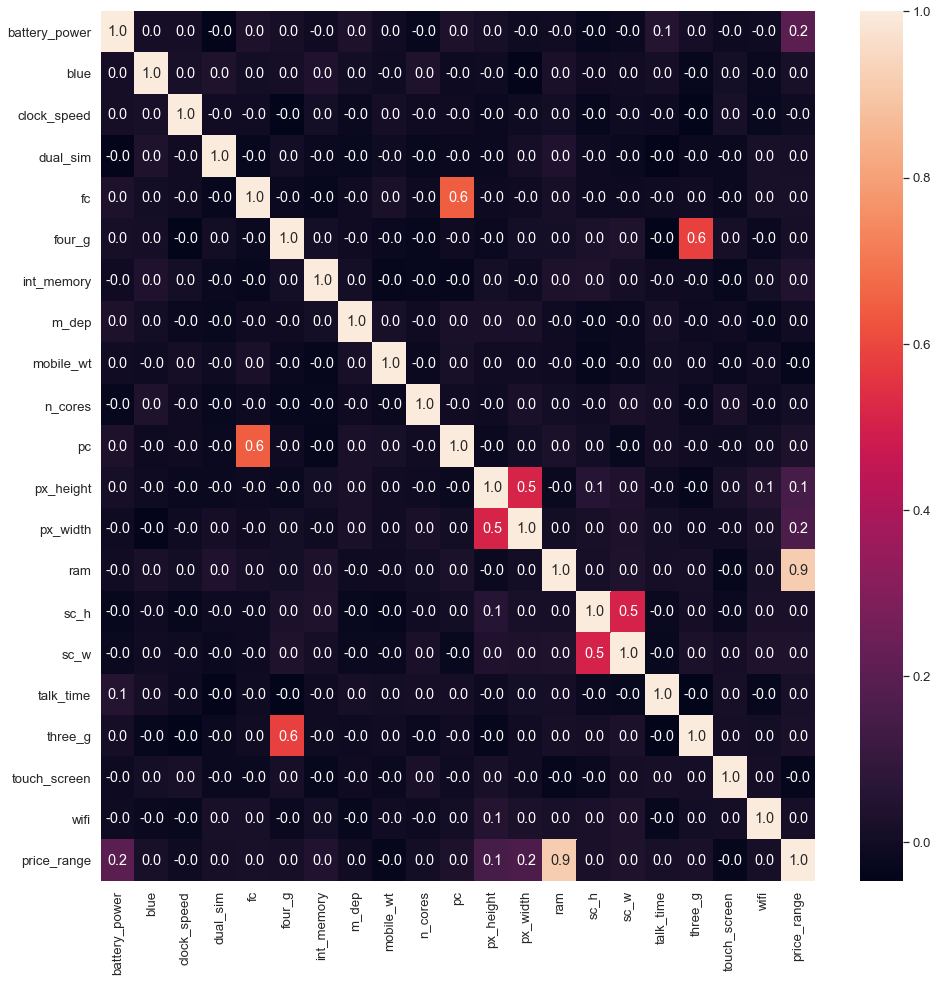

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".1f");


The relationship between price_renge and ram  is strong    
pc_width and pc_height is also correlated with price_range  
battery_power is also correlated with price_range  


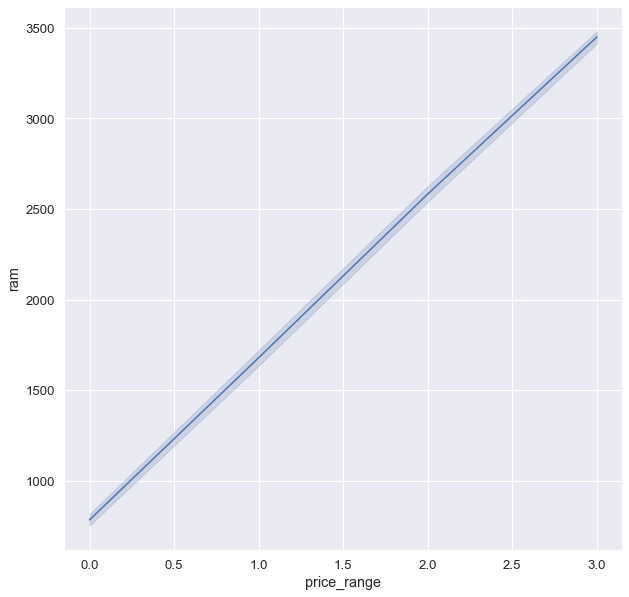

In [11]:
sns.lineplot(x="price_range",y="ram",data=df)

The more RAM, the higher the price_renge 

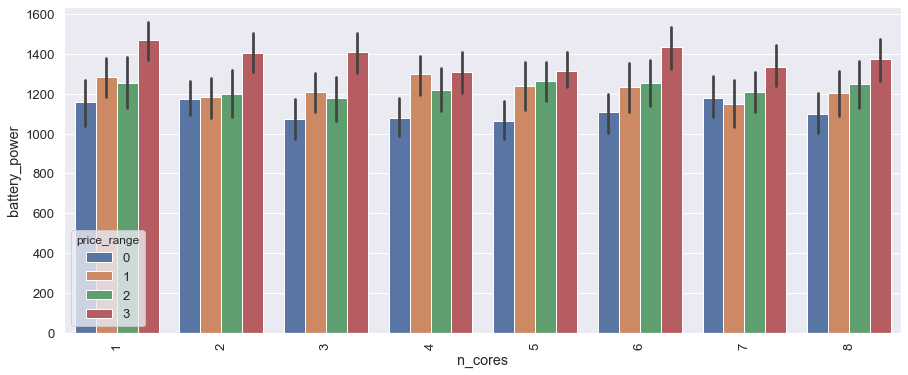

In [12]:
plt.figure(figsize=(15,6));
sns.barplot( x= "n_cores", y = "battery_power" ,hue="price_range", data=df)
plt.xticks(rotation=90);

الشكل بيبين قوة البطاريه وعدد النوي مع الرنج بتاع السعر  

The higher the number of cores, the higher the price

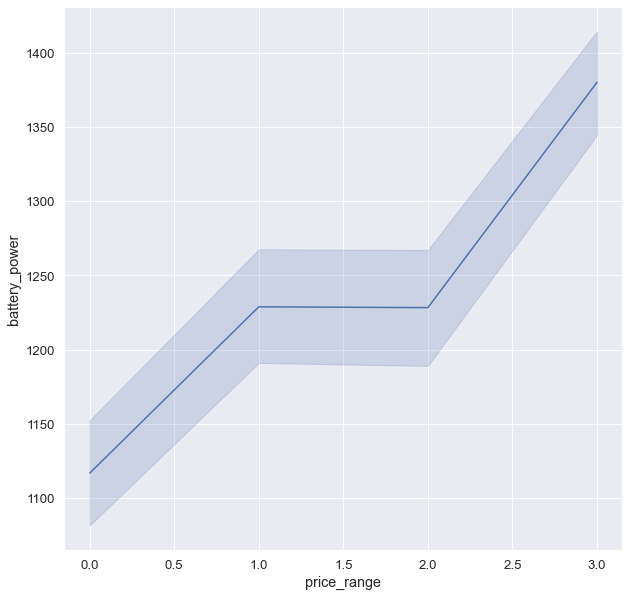

In [13]:
sns.lineplot(x="price_range",y="battery_power",data=df)

The more battery_power, the higher the price_renge 

ولكن ثابته في فتره 

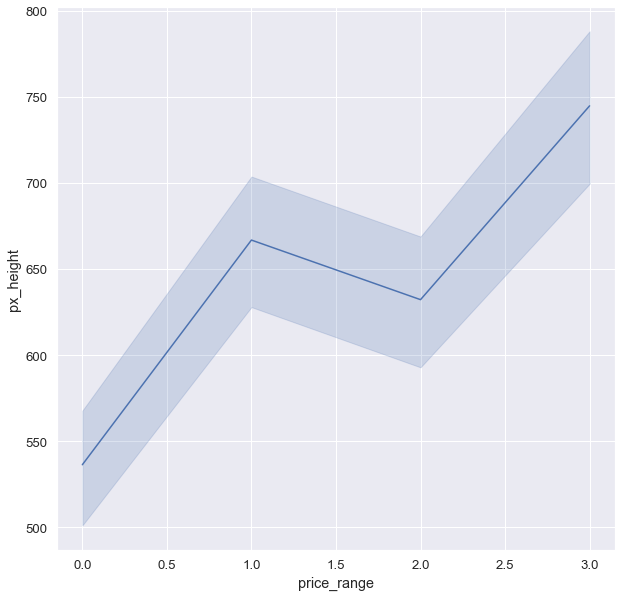

In [14]:
sns.lineplot(x="price_range",y="px_height",data=df)

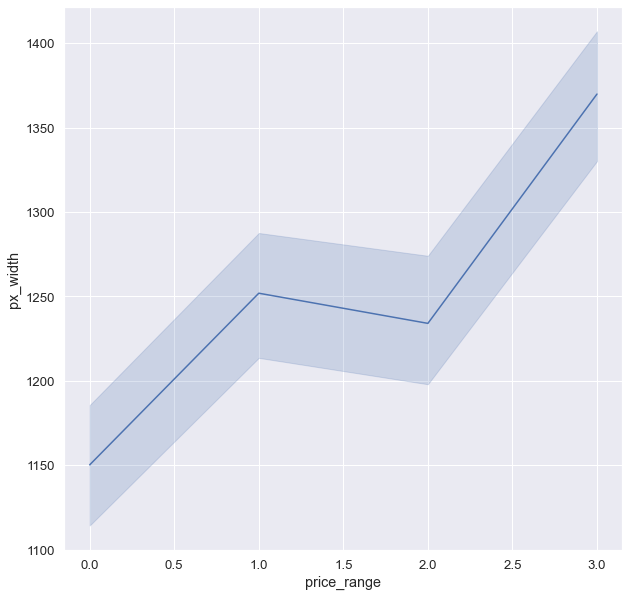

In [15]:
sns.lineplot(x="price_range",y="px_width",data=df)

The more px_width or px_height, the higher the price_renge 

ولكن بتقل في فتره

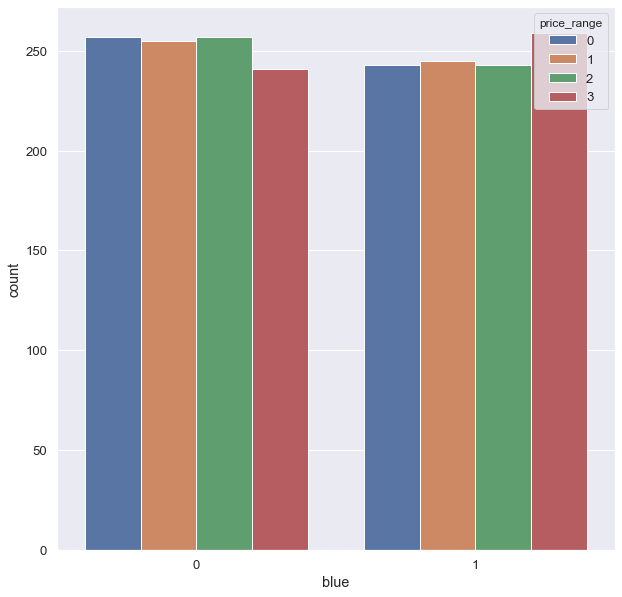

In [16]:
sns.countplot(df['blue'],hue=df["price_range"])

 عندما يكون ازرق ينحاز الي الرنج 3 وعندما لا يكون ازرق ينحاز الي الرنج 0 و 2

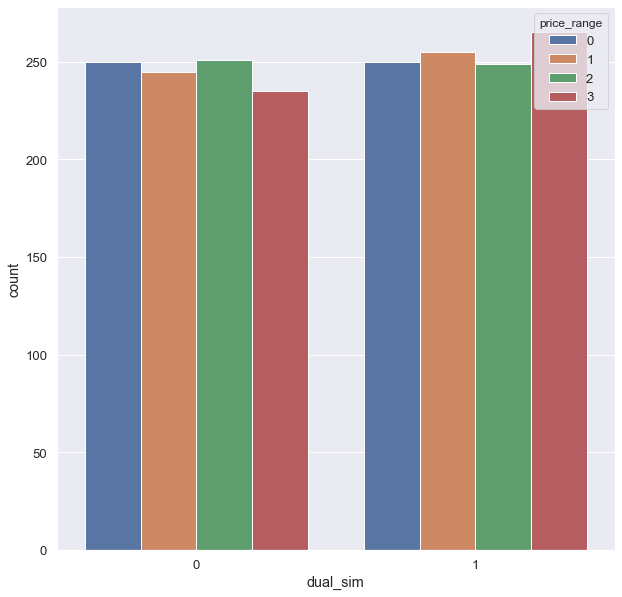

In [17]:
sns.countplot(df['dual_sim'],hue=df["price_range"])

عندما يكون بشريحتين ينحاز الي الرنج 3 وعندما  يكون بشريحه ينحاز الي الرنج 0 و 2  

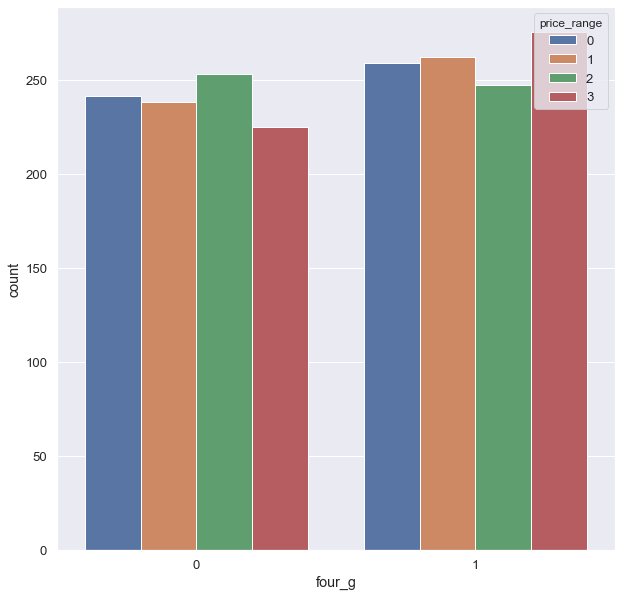

In [18]:
sns.countplot(df['four_g'],hue=df["price_range"])

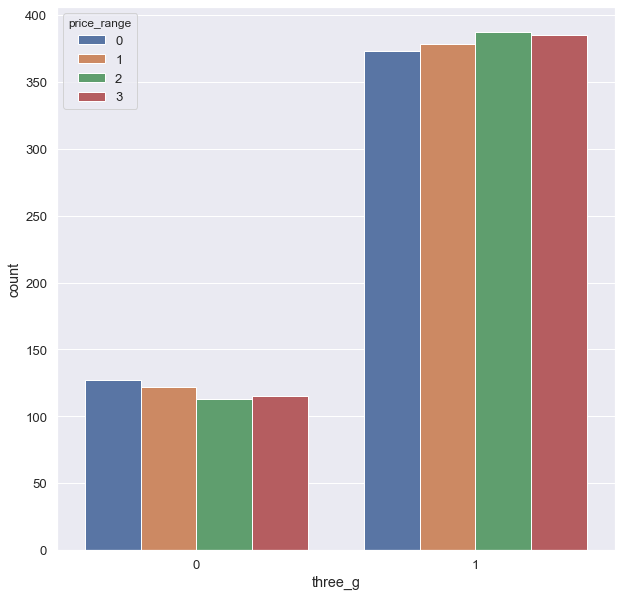

In [19]:
sns.countplot(df['three_g'],hue=df["price_range"])

If it is 4G, the range(3) is biased 
 


If it is 3G, the range(2) is biased

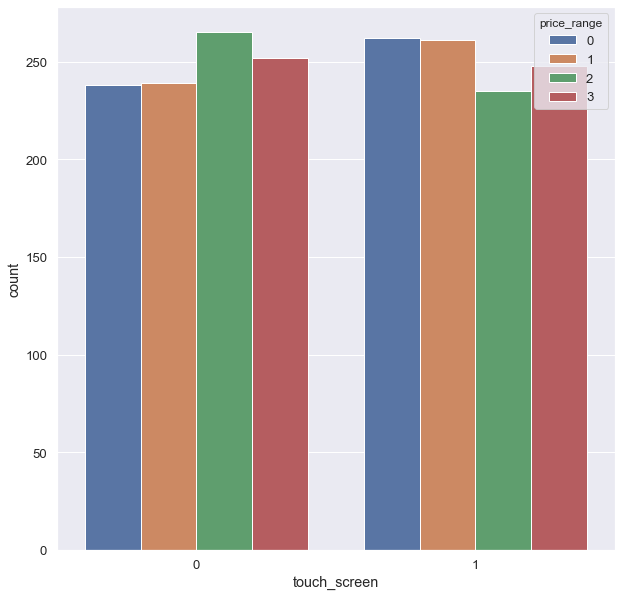

In [20]:
sns.countplot(df['touch_screen'],hue=df["price_range"])

If it is touch_screen, the range(0,1) is biased

If it is not touch_screen, the range(2) is biased

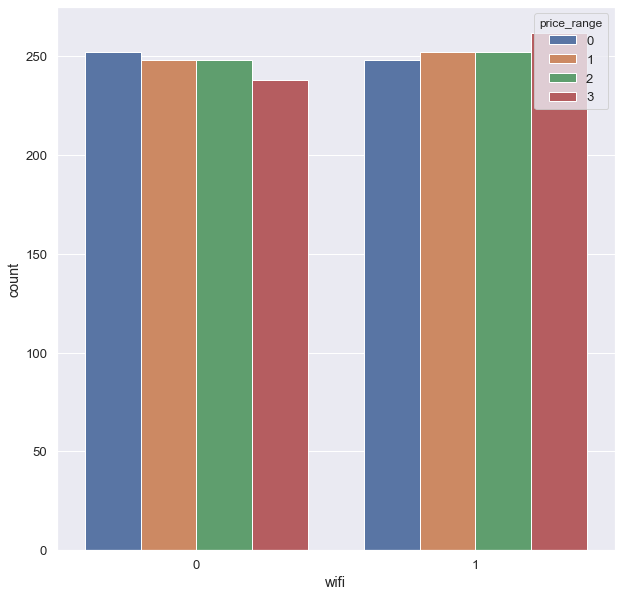

In [21]:
sns.countplot(df['wifi'],hue=df["price_range"])

If it have wifi, the range(3) is biased

If it have not wifi, the range(1) is biased

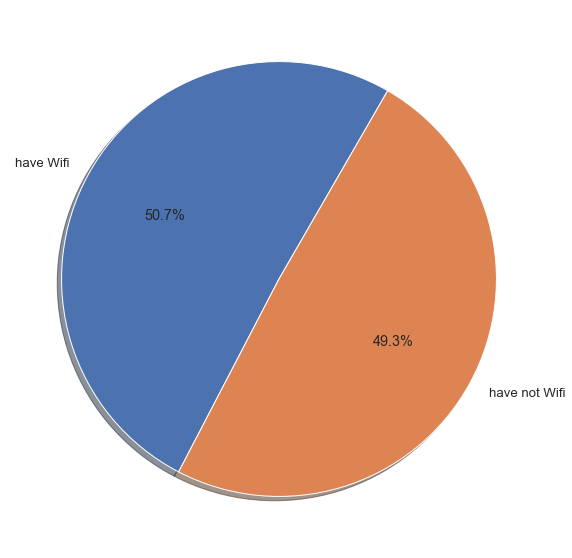

In [22]:
labels = ["have Wifi",'have not Wifi']
values=df['wifi'].value_counts().values
fig1, a1 = plt.subplots()
a1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=60)
plt.show()

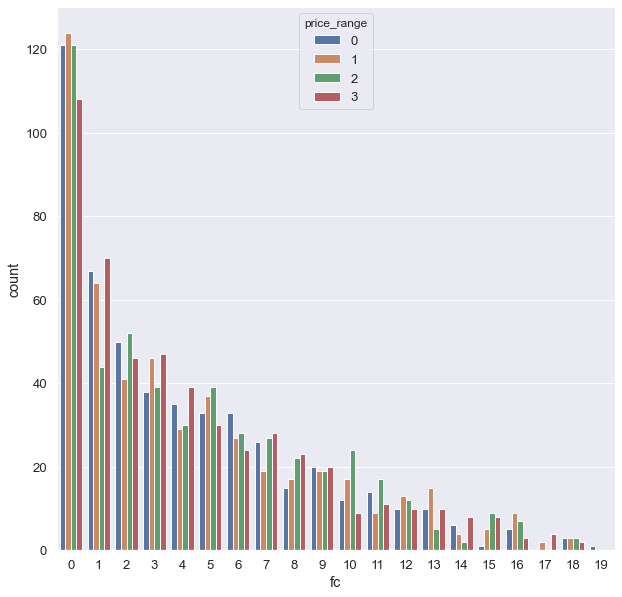

In [23]:
sns.countplot(df['fc'],hue=df["price_range"])

# Data Cleaning

# outlire

In [24]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

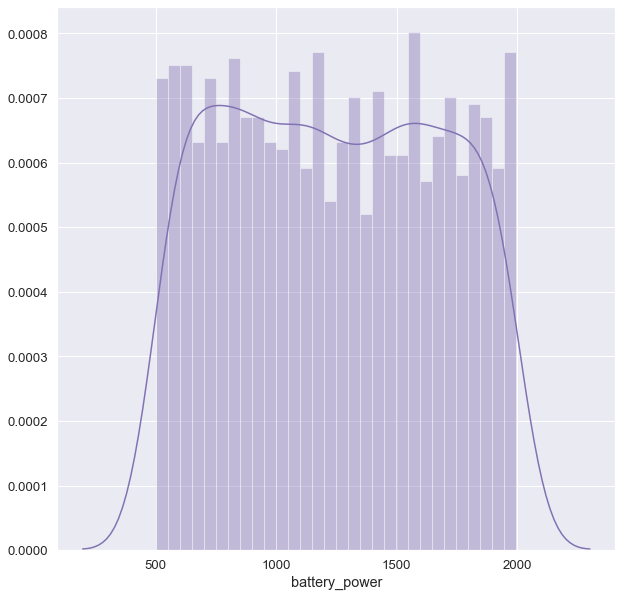

In [25]:
sns.distplot(df['battery_power'], kde=True, bins=30, color='m')

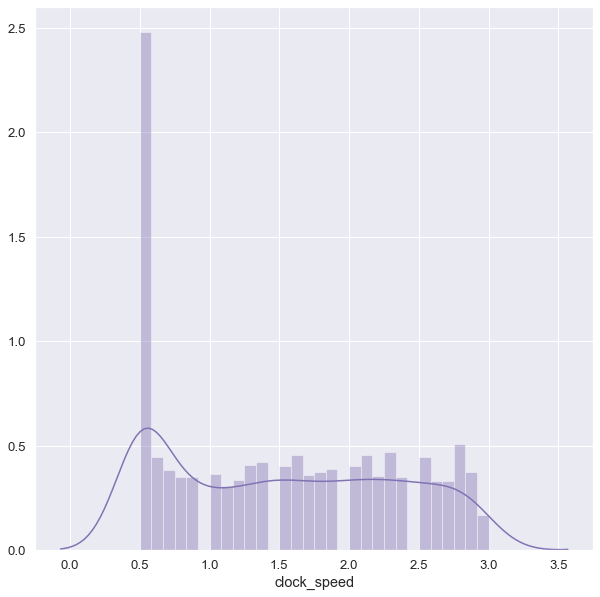

In [26]:
sns.distplot(df['clock_speed'], kde=True, bins=30, color='m')

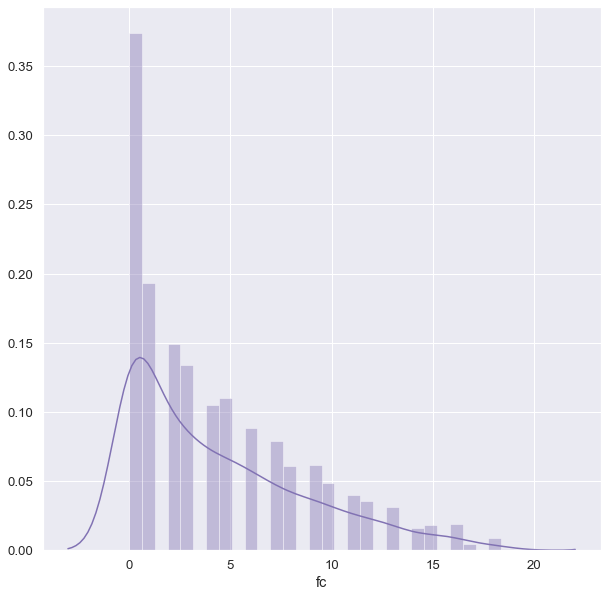

In [27]:
sns.distplot(df['fc'], kde=True, bins=30, color='m')

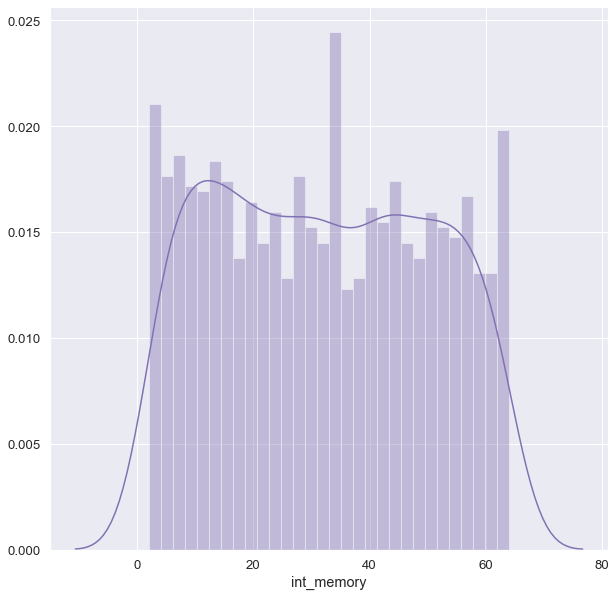

In [28]:
sns.distplot(df['int_memory'], kde=True, bins=30, color='m')

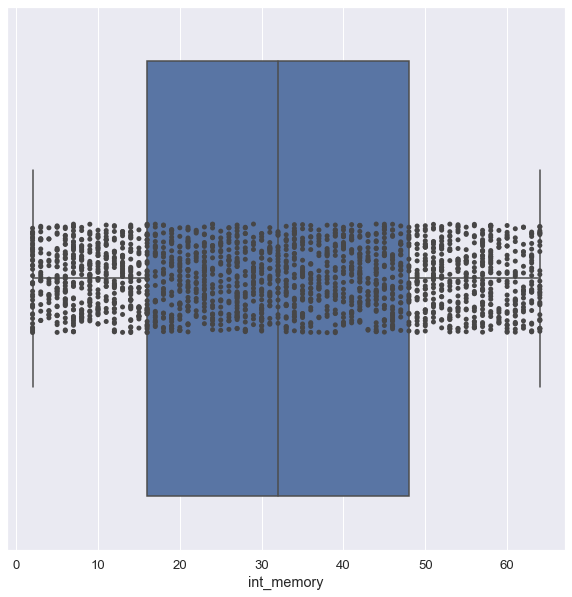

In [29]:
sns.boxplot(x='int_memory', data=df)
sns.stripplot(x='int_memory', data=df, color="#474646")

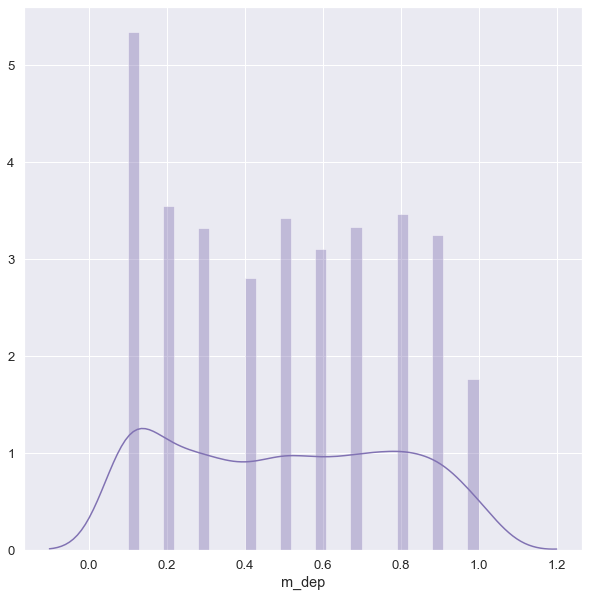

In [30]:
sns.distplot(df['m_dep'], kde=True, bins=30, color='m')

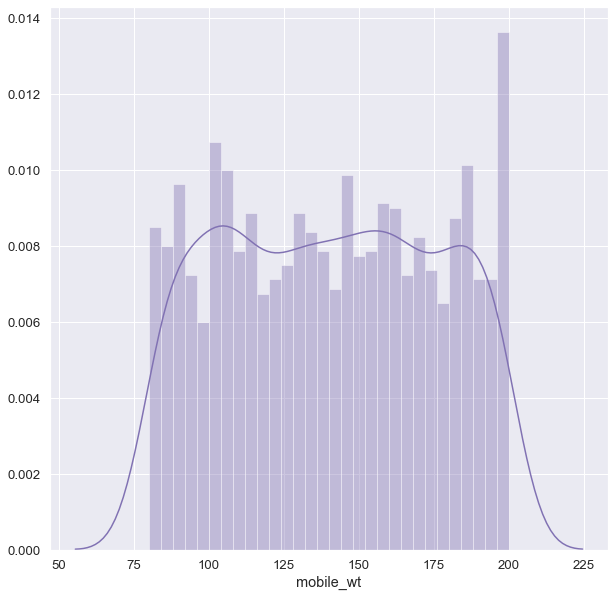

In [31]:
sns.distplot(df['mobile_wt'], kde=True, bins=30, color='m')

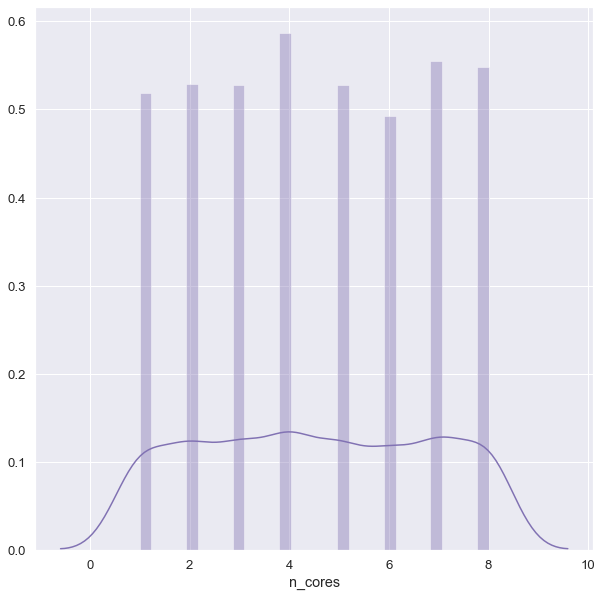

In [32]:
sns.distplot(df['n_cores'], kde=True, bins=30, color='m')

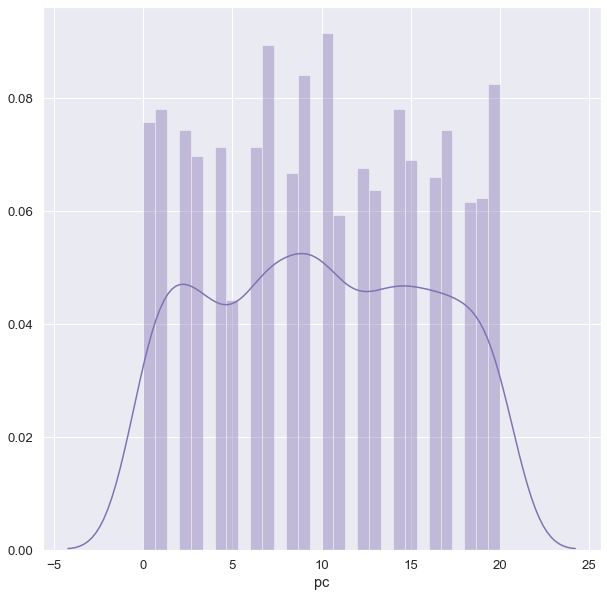

In [33]:
sns.distplot(df['pc'], kde=True, bins=30, color='m')

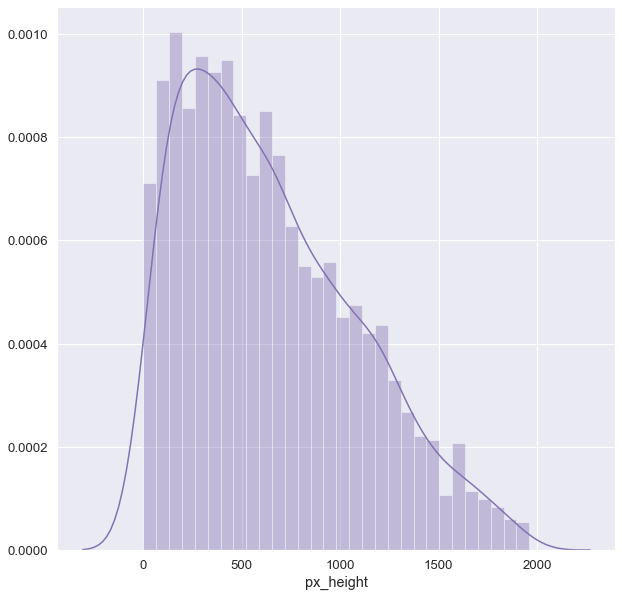

In [34]:
sns.distplot(df['px_height'], kde=True, bins=30, color='m')

'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',

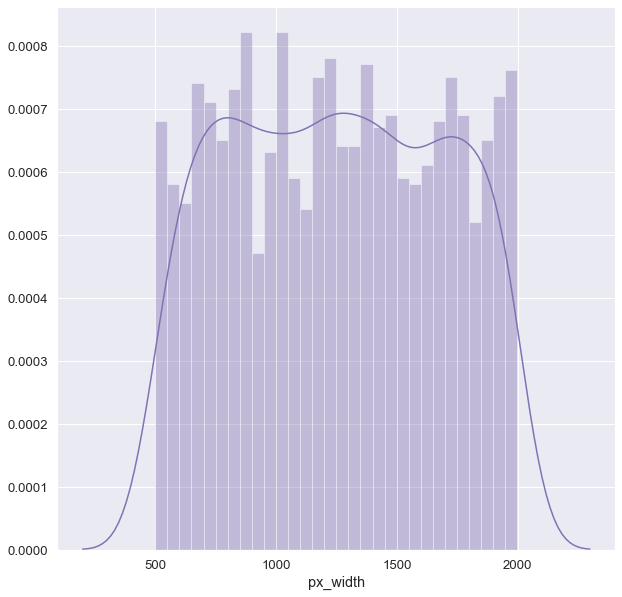

In [35]:
sns.distplot(df['px_width'], kde=True, bins=30, color='m')

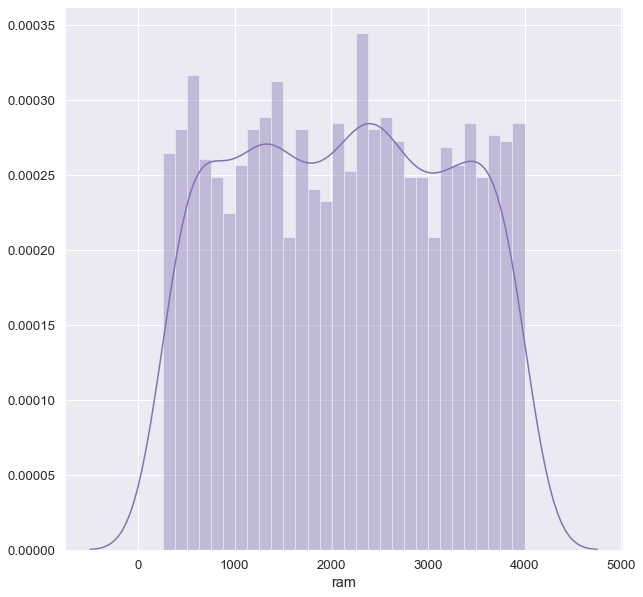

In [36]:
sns.distplot(df['ram'], kde=True, bins=30, color='m')

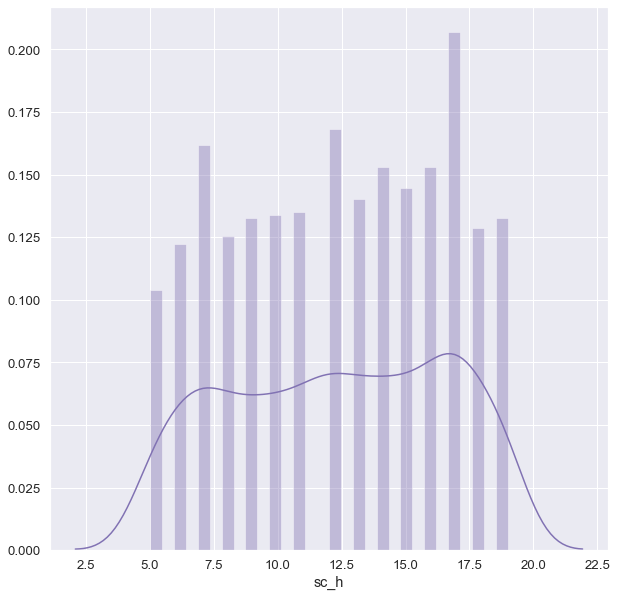

In [37]:
sns.distplot(df['sc_h'], kde=True, bins=30, color='m')

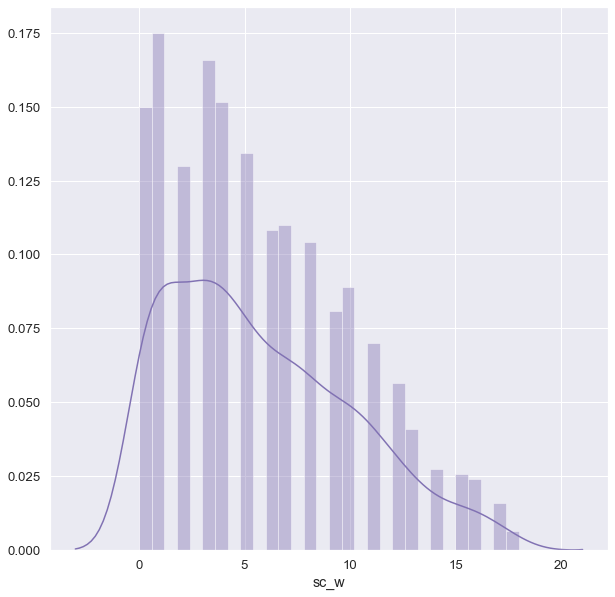

In [38]:
sns.distplot(df['sc_w'], kde=True, bins=30, color='m')

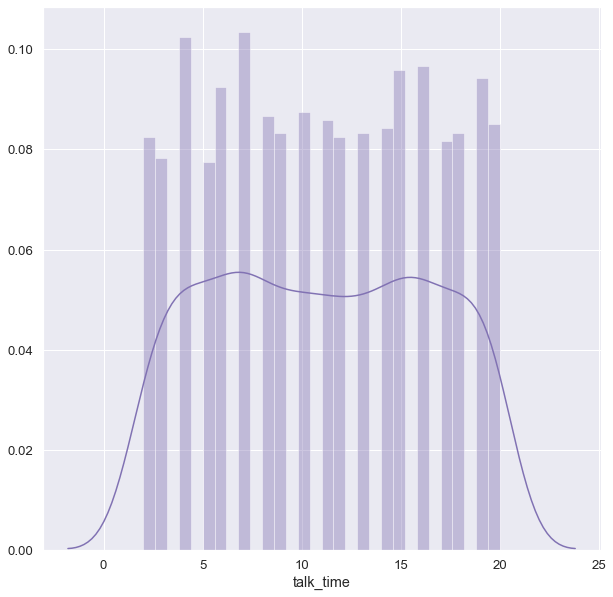

In [39]:
sns.distplot(df['talk_time'], kde=True, bins=30, color='m')

There is no out lire

# Model Preparation
^Normalization with StandardScaler   
^Split training and testing

In [40]:
dff=df.copy()

In [41]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [42]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()

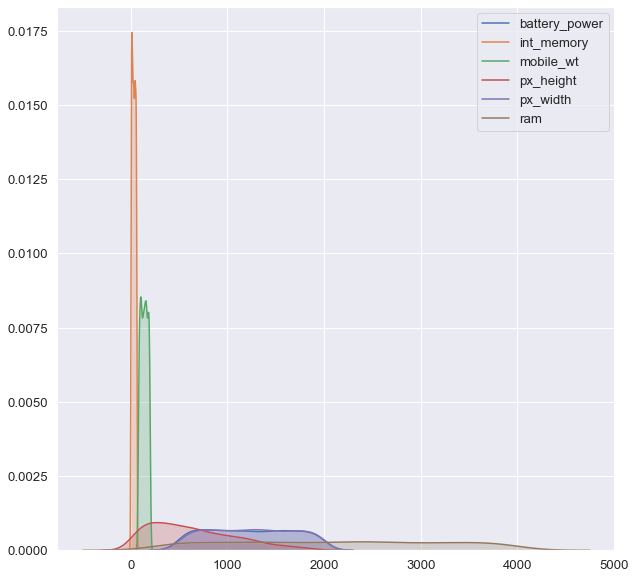

In [43]:
sns.kdeplot(df['battery_power'], shade=True)
sns.kdeplot(df['int_memory'], shade=True)
sns.kdeplot(df['mobile_wt'], shade=True)
sns.kdeplot(df['px_height'], shade=True)
sns.kdeplot(df['px_width'], shade=True)
sns.kdeplot(df['ram'], shade=True)

In [44]:
for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

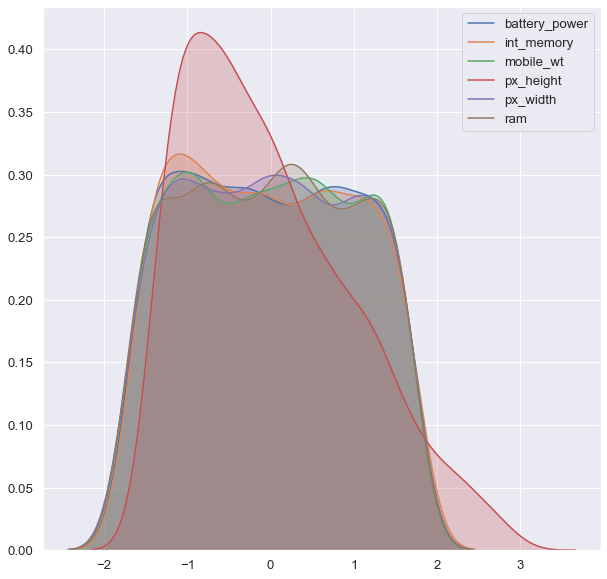

In [45]:
sns.kdeplot(df['battery_power'], shade=True)
sns.kdeplot(df['int_memory'], shade=True)
sns.kdeplot(df['mobile_wt'], shade=True)
sns.kdeplot(df['px_height'], shade=True)
sns.kdeplot(df['px_width'], shade=True)
sns.kdeplot(df['ram'], shade=True)

In [46]:
x=df.drop('price_range', axis = 1)
y=df['price_range']
xf=df.drop('price_range', axis = 1)
yf=df['price_range']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=90)
xf_train, xf_test, yf_train, yf_test = train_test_split(xf, yf, test_size = 0.25, random_state = 42)


In [48]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression(random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
from sklearn.svm import SVC
svm = SVC(random_state=42)
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()


In [49]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score

# LogisticRegression

In [50]:
cv_results = cross_validate(lg, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.23239279, 0.21143579, 0.23437619, 0.2154243 , 0.27426529,
        0.25332642, 0.26129985, 0.14660358, 0.23736143, 0.21542263]),
 'score_time': array([0.01295638, 0.00698066, 0.00697923, 0.00498796, 0.00398898,
        0.00398445, 0.00498843, 0.00099707, 0.00299191, 0.00299549]),
 'test_score': array([0.95 , 0.955, 0.925, 0.945, 0.925, 0.95 , 0.95 , 0.935, 0.935,
        0.965]),
 'train_score': array([0.95833333, 0.94833333, 0.95722222, 0.95166667, 0.95222222,
        0.95555556, 0.95666667, 0.95611111, 0.95055556, 0.96      ])}

In [51]:
cross_val_score(lg, x, y, cv=10, n_jobs=-1).mean()

0.9435

In [52]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(lg,grid,cv=10)
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9286666666666668


In [53]:
lgg=LogisticRegression(penalty='l2',C=10,random_state=42)
lgg.fit(x_train,y_train)
y_pred=lgg.predict(x_test)
accuracy_score(y_test, y_pred)

0.928

# KNeighborsClassifier

In [54]:
cv_results = cross_validate(knn, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.01496029, 0.03191304, 0.01695371, 0.0149591 , 0.0149591 ,
        0.0149591 , 0.0159564 , 0.01595616, 0.0229373 , 0.01895142]),
 'score_time': array([0.01894927, 0.03790236, 0.0239377 , 0.01895523, 0.01994801,
        0.02493382, 0.02194214, 0.03690004, 0.02493691, 0.02393556]),
 'test_score': array([0.38 , 0.33 , 0.35 , 0.36 , 0.335, 0.38 , 0.38 , 0.31 , 0.38 ,
        0.305]),
 'train_score': array([0.58388889, 0.57555556, 0.58055556, 0.58833333, 0.59111111,
        0.585     , 0.58444444, 0.58333333, 0.595     , 0.60555556])}

In [55]:
cross_val_score(knn, x, y, cv=10, n_jobs=-1).mean()

0.35100000000000003

In [56]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)
print (grid.best_score_)
print (grid.best_params_)

0.37866666666666665
{'n_neighbors': 36, 'weights': 'distance'}


In [57]:
kn=KNeighborsClassifier(n_neighbors=36,weights='distance')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
accuracy_score(y_test, y_pred)

0.37

# DecisionTreeClassifier

In [58]:
cv_results = cross_validate(dt, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.02094269, 0.02294087, 0.02094126, 0.02194405, 0.01595688,
        0.01894903, 0.02094579, 0.02294159, 0.01994371, 0.01595473]),
 'score_time': array([0.00299573, 0.00199127, 0.00199556, 0.00398517, 0.00099754,
        0.00299358, 0.00199366, 0.00298858, 0.00299191, 0.00199533]),
 'test_score': array([0.825, 0.87 , 0.865, 0.825, 0.835, 0.845, 0.83 , 0.81 , 0.87 ,
        0.785]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [59]:
cross_val_score(dt, x, y, cv=10, n_jobs=-1).mean()

0.836

In [60]:
tree_para = {'criterion':['gini','entropy'],'max_depth':list(range(1,50))}
clf = GridSearchCV(dt, tree_para, cv=5)
clf.fit(x_train,y_train)
print (clf.best_score_)
print (clf.best_params_)

0.8306666666666667
{'criterion': 'gini', 'max_depth': 7}


In [61]:
cl=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=42)
cl.fit(x_train,y_train)
y_pred=cl.predict(x_test)
accuracy_score(y_test, y_pred)

0.818

# RandomForestClassifier

In [62]:
cv_results = cross_validate(rfc, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.55651093, 0.55351758, 0.55052614, 0.55152297, 0.56050134,
        0.54952979, 0.55950069, 0.55451417, 0.29221821, 0.29221892]),
 'score_time': array([0.01994658, 0.01994753, 0.02094507, 0.01994753, 0.02094173,
        0.01994705, 0.0209446 , 0.02094483, 0.01196814, 0.01097059]),
 'test_score': array([0.895, 0.86 , 0.895, 0.855, 0.895, 0.9  , 0.86 , 0.875, 0.85 ,
        0.9  ]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [63]:
cross_val_score(rfc, x, y, cv=10, n_jobs=-1).mean()

0.8785000000000001

# svm

In [64]:
cv_results = cross_validate(svm, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.26927757, 0.2553122 , 0.26528788, 0.26029944, 0.25531507,
        0.25531411, 0.26429224, 0.25431967, 0.15658045, 0.15857482]),
 'score_time': array([0.01894975, 0.0199461 , 0.01894951, 0.01994753, 0.01894903,
        0.01994753, 0.01994658, 0.01894999, 0.01097059, 0.01097083]),
 'test_score': array([0.765, 0.725, 0.715, 0.745, 0.78 , 0.77 , 0.73 , 0.735, 0.75 ,
        0.745]),
 'train_score': array([0.80444444, 0.79555556, 0.79611111, 0.80555556, 0.80111111,
        0.79388889, 0.79777778, 0.79777778, 0.79888889, 0.80111111])}

In [65]:
cross_val_score(svm, x, y, cv=10, n_jobs=-1).mean()

0.746

In [66]:
params = [
        {'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}
         ]

grid_search = GridSearchCV(estimator=svm,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(x_train,y_train)
print (grid_search.best_score_)
print (grid_search.best_params_)

0.9600000000000002
{'C': 10, 'kernel': 'linear'}


In [87]:
sv= SVC(C=10,kernel='linear',random_state=42)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.968

In [88]:
y_pred

array([1, 1, 3, 2, 3, 1, 1, 1, 2, 0, 0, 3, 3, 1, 2, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 3, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 3, 1, 3, 1, 2, 3, 3, 2, 3,
       0, 2, 2, 0, 0, 1, 3, 3, 0, 3, 0, 2, 0, 1, 0, 3, 1, 0, 2, 3, 2, 3,
       2, 0, 3, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2,
       3, 0, 0, 3, 0, 2, 1, 3, 0, 1, 2, 2, 3, 0, 1, 2, 1, 0, 3, 2, 3, 2,
       1, 2, 3, 3, 3, 0, 3, 2, 0, 0, 2, 0, 1, 3, 3, 2, 2, 3, 0, 1, 0, 3,
       1, 3, 2, 0, 2, 3, 2, 0, 2, 2, 3, 1, 0, 2, 0, 0, 1, 3, 0, 3, 0, 1,
       2, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 3, 3, 1, 0, 0, 2, 0, 1, 3, 2, 3,
       3, 0, 2, 2, 1, 2, 0, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2,
       2, 3, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 3, 0, 2, 3, 1, 1, 2, 3, 1, 3,
       0, 2, 3, 0, 2, 0, 3, 3, 3, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 1, 3, 2,
       0, 1, 1, 1, 1, 0, 3, 0, 3, 2, 2, 0, 1, 1, 1, 2, 2, 0, 3, 0, 2, 1,
       2, 3, 3, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 3, 3,

# GaussianNB

In [68]:
cv_results = cross_validate(nb, x, y, cv=10, return_train_score=True, n_jobs=-1)
cv_results

{'fit_time': array([0.00897717, 0.00897717, 0.00797057, 0.00698209, 0.00698328,
        0.01097131, 0.0089798 , 0.00598383, 0.00598168, 0.00498605]),
 'score_time': array([0.00299263, 0.00299263, 0.0029943 , 0.00299382, 0.00598979,
        0.00199294, 0.00198865, 0.0030036 , 0.00199533, 0.0030036 ]),
 'test_score': array([0.805, 0.81 , 0.83 , 0.82 , 0.825, 0.835, 0.795, 0.815, 0.795,
        0.79 ]),
 'train_score': array([0.82166667, 0.82055556, 0.815     , 0.81944444, 0.81611111,
        0.81444444, 0.82277778, 0.81555556, 0.815     , 0.81888889])}

In [69]:
cross_val_score(nb, x, y, cv=10, n_jobs=-1).mean()

0.812

# the best algorithem Grid Search with svm


In [70]:
sv= SVC(C=10,kernel='linear',random_state=42)
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.968

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.96      0.96      0.96       115
           2       0.95      0.95      0.95       122
           3       0.97      0.98      0.97       135

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [72]:
confusion_matrix(y_test, y_pred)

array([[126,   2,   0,   0],
       [  2, 110,   3,   0],
       [  0,   2, 116,   4],
       [  0,   0,   3, 132]], dtype=int64)

# The second algorithem Cross Validation with LogisticRegression

In [73]:
y_pred = cross_val_predict(lg, x, y, cv=10, n_jobs=-1)
y_pred

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [74]:
cross_val_score(lg, x, y, cv=10, n_jobs=-1).mean()

0.9435

In [75]:
accuracy_score(y, y_pred)

0.9435

In [76]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.94      0.92      0.93       500
           2       0.94      0.92      0.93       500
           3       0.95      0.97      0.96       500

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [77]:
confusion_matrix(y, y_pred)

array([[483,  17,   0,   0],
       [ 26, 461,  13,   0],
       [  0,  14, 460,  26],
       [  0,   0,  17, 483]], dtype=int64)

# Price prediction of Test.csv Using Grid Search with svm

In [78]:
df1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [79]:
df1=df1.drop('id', axis = 1)

In [80]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [90]:
for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df1[column] = stand.fit_transform(df1[column].values.reshape(-1,1))

In [91]:
sv= SVC(C=10,kernel='linear',random_state=42)
sv.fit(x_train,y_train)
y_pred=sv.predict(df1)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [92]:
df1['price_range']=y_pred

In [93]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.475451,1,1.8,1,14,0,-1.581269,0.1,1.535535,3,...,-0.926990,0.391912,1.229373,12,7,2,0,1,0,3
1,-0.942782,1,0.5,1,4,1,1.509303,0.8,1.478120,5,...,0.274729,-0.871028,1.614643,6,0,7,1,0,0,3
2,1.292077,1,2.8,0,1,0,-0.367116,0.9,1.334582,3,...,1.485693,0.287236,0.236313,17,10,10,0,1,1,2
3,0.688249,0,0.5,1,18,1,-0.477493,0.5,-1.249091,8,...,-0.767532,1.165604,1.612804,10,0,7,1,1,0,3
4,0.429135,0,1.4,0,11,1,0.847037,0.5,-0.904602,6,...,0.281662,-0.977979,-0.336535,15,8,7,1,0,1,1
